# Project Assignment - Diabetic prevalence among pregnant women  (kaggle)
This is the coolking's project assignment for zerotopandas project. The dataset used is diabetes.csv (sourced from kaggle.com). 

https://www.kaggle.com/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



In [1]:
import pandas as pd
import numpy as np
import jovian
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

First, we have to read in the dataset into pandas.

In [2]:
x=pd.read_csv('diabetes.csv')

Now let us look at a high level overview of the dataset.

In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


I was hoping we would have atleast some text data but it looks like all of it is numeric data. Let us try to see if there is a 1) correlation between the various contributing factors and outcome 2)general distribution of BMI, glucose levels for diabetec vs non diabetic patients and 3) general distribution of pregnancies

Now let us look at the descriptive statistics for the numeric columns. 

In [4]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Women beyond the menstrual age are being included in this dataset. Maybe we should look at the distribution of the age.

Let's look at the distribution of age.

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

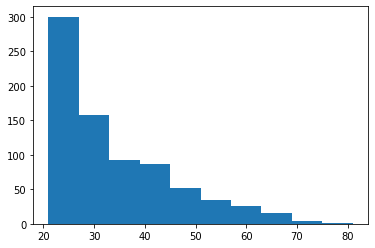

In [5]:
plt.hist(x['Age'])

Since this study is about pregnant women, it is not suprising to see a skewed distribution for age with more data on younger women than older women. It is also suprising to see women above age of 50 in the data. Maybe we should filter the data for age between 20-50.

 Also it is a good idea to calculate the obesity levels for each women based on the ranges given by CDC here https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html.
BMI	Weight       Status
Below 18.5	     Underweight
18.5 – 24.9	     Normal or Healthy Weight
25.0 – 29.9	     Overweight
30.0 and Above	 Obese

In [6]:
def _status_calc(y):
    if y <18.5:
        z='Underweight'
    elif 18.5<=y<25:
        z='Normal or Healthy Weight'
    elif 25 <=y <30:
        z='OverWeight'
    else:
        z='Obese'
    return z
x['BMI_status']=x['BMI'].apply(_status_calc)

In [7]:
x.head(18)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_status
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,OverWeight
2,8,183,64,0,0,23.3,0.672,32,1,Normal or Healthy Weight
3,1,89,66,23,94,28.1,0.167,21,0,OverWeight
4,0,137,40,35,168,43.1,2.288,33,1,Obese
5,5,116,74,0,0,25.6,0.201,30,0,OverWeight
6,3,78,50,32,88,31.0,0.248,26,1,Obese
7,10,115,0,0,0,35.3,0.134,29,0,Obese
8,2,197,70,45,543,30.5,0.158,53,1,Obese
9,8,125,96,0,0,0.0,0.232,54,1,Underweight


https://www.webmd.com/diabetes/guide/normal-blood-sugar-levels-chart-adults
We can also calculate if the glucose levels are on target based on the above link.

Now let us look at the correlation between BMI and BloodPressure. Is there a link between heavier bodies and BP

Text(0, 0.5, 'BloodPressure')

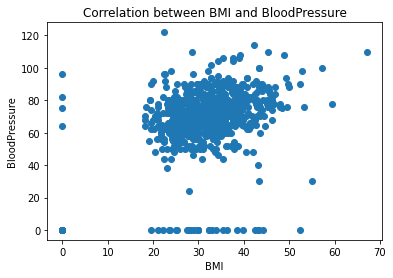

In [8]:
plt.scatter(x['BMI'],x['BloodPressure'])
plt.title('Correlation between BMI and BloodPressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')

Now let us look at a correlation matrix using all the numeric variables. Since several of them are all vital statistics, we can see if there is a link between 2 or more variables.

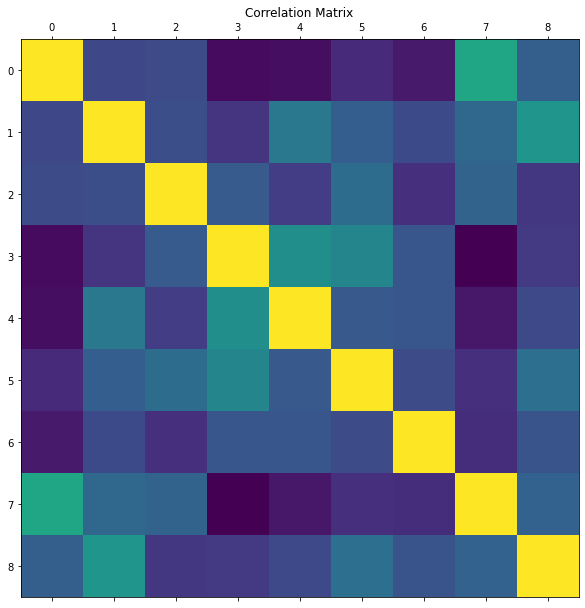

In [9]:
f = plt.figure(figsize=(10,12))
plt.matshow(x.corr(),f.number)
plt.title('Correlation Matrix')
plt.show()

There seems to be a high correlation between 1) the number of pregnancies and skin thickness 2) number of pregnancies and insulin and 3) Age and skin thickness. However, we should disregard age since some of the pregnant women seem to be between 50-80 years. Alternatively, we can check for menstrual aged women only

Questions regarding the dataset - 1) Which group of BMI status has higher prevalence of diabetes (higher % of 1 in outcome)   2)  What are ranges of blood pressure for each BMI status group 3) Which BMI status group has a higher average glucose? 4) Do obese women tend to have higher pregnancies on average? 5)how does the glucose values differ between groups?

In [10]:
diab_groups1=x.groupby('BMI_status').agg({'Outcome':['sum']})
diab_groups1.reset_index()
diab_groups1.columns=['postive_outcomes']
diab_groups1['total_outcomes']=x.groupby('BMI_status').size()

In [11]:
diab_groups1

,postive_outcomes,total_outcomes
BMI_status,,
Normal or Healthy Weight,7,102
Obese,219,472
OverWeight,40,179
Underweight,2,15


We can clearly notice that obese women have higher % of positive outcomes

In [12]:
diab_groups2=x.groupby('BMI_status').agg({'BloodPressure':['mean','min','max']})
diab_groups2

BloodPressure         
                                  mean min  max
BMI_status                                     
Normal or Healthy Weight     64.588235   0  122
Obese                        71.921610   0  114
OverWeight                   66.720670   0  110
Underweight                  39.666667   0   96

Answer to question 2) is the minimum blood pressure does not look right. Usually we see systolic and diastolic for blood pressure both of which are non-zero values. But here we are noticing 0 as the minimum BP which is not correct. Answer to question 3) is that Obese women noticeably have higher average bloodpressure

In [13]:
diab_groups_avgprg=x.groupby('BMI_status').agg({'Pregnancies':['mean']})
diab_groups_avgprg

,Pregnancies
,mean
BMI_status,
Normal or Healthy Weight,3.245098
Obese,4.019068
OverWeight,3.793296
Underweight,3.066667


Answer to question 4) Obese women do have more pregnancies afterall and underweight women the least.

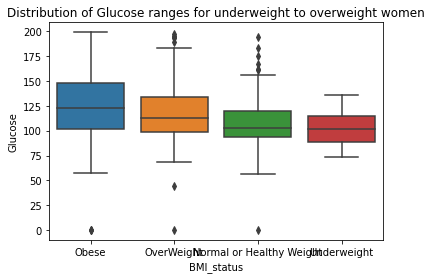

In [14]:
plt.title('Distribution of Glucose ranges for underweight to overweight women');
sb.boxplot(x['BMI_status'],x['Glucose']);

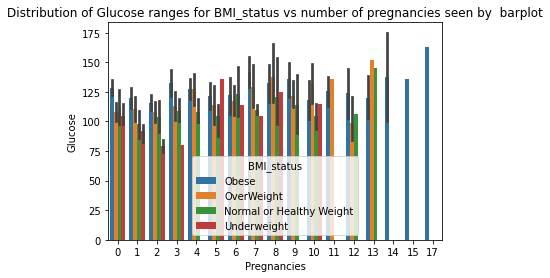

In [15]:
plt.title('Distribution of Glucose ranges for BMI_status vs number of pregnancies seen by  barplot');
sb.barplot(x['Pregnancies'],x['Glucose'],hue=x['BMI_status']);

In [ ]:
jovian.commit(project='EDA_diabetes_thecoolking',files=['diabetes.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
